In [1]:
import os
from qbraid.runtime import IonQProvider


api_key = "zX6nxTjXeClRj930SzRVRV3IrP6yg2NQ"
print(api_key)
provider = IonQProvider(api_key=api_key)
devices = provider.get_devices()
print(devices)



devices = provider.get_devices()


zX6nxTjXeClRj930SzRVRV3IrP6yg2NQ
[<qbraid.runtime.ionq.device.IonQDevice('qpu.harmony')>, <qbraid.runtime.ionq.device.IonQDevice('qpu.aria-1')>, <qbraid.runtime.ionq.device.IonQDevice('qpu.aria-2')>, <qbraid.runtime.ionq.device.IonQDevice('qpu.forte-1')>, <qbraid.runtime.ionq.device.IonQDevice('qpu.forte-enterprise-1')>, <qbraid.runtime.ionq.device.IonQDevice('qpu.forte-enterprise-2')>, <qbraid.runtime.ionq.device.IonQDevice('simulator')>]


In [2]:
from qbraid.runtime import IonQProvider

provider = IonQProvider(api_key)
device = provider.get_device("simulator")

for backend_id in ["qpu.aria-1","qpu.aria-2", "qpu.forte-1", "qpu.forte-enterprise-1","qpu.forte-enterprise-2", "qpu.harmony", "simulator"]:
    char_data = provider.get_device(backend_id).profile.characterization or {}
    print(backend_id, char_data)


qpu.aria-1 {'id': '1ffc69c4-df54-47a6-8d4b-6bb5ec3cefb9', 'date': 1756684800, 'backend': 'qpu.aria-1', 'qubits': 25, 'connectivity': [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [2, 20], [2, 21], [2, 22], [2, 23], [2, 24], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [3, 21], [3, 22], [3, 23], [3, 24], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [

In [3]:
from qbraid.runtime import IonQProvider

provider = IonQProvider(api_key)

backends = [
    "qpu.aria-1", "qpu.aria-2", "qpu.forte-1",
    "qpu.forte-enterprise-1", "qpu.forte-enterprise-2",
    "qpu.harmony", "simulator"
]

for b in backends:
    try:
        # Estado real del backend (sin depender de characterization)
        status = provider.session.get_device(b).get("status")  # "available"/"running"/"unavailable"/etc.
        ready = status in ("available", "running")

        # Characterization (puede venir vacía por falta de snapshot o permiso)
        dev = provider.get_device(b)
        char = dev.profile.characterization or {}

        print(f"{b}: status={status}, ready={ready}, char={'sí' if char else 'no'}")
    except Exception as e:
        print(f"{b}: no accesible -> {e}")


qpu.aria-1: status=unavailable, ready=False, char=sí
qpu.aria-2: status=unavailable, ready=False, char=sí
qpu.forte-1: status=unavailable, ready=False, char=sí
qpu.forte-enterprise-1: status=available, ready=True, char=sí
qpu.forte-enterprise-2: status=unavailable, ready=False, char=no
qpu.harmony: status=retired, ready=False, char=no
simulator: status=available, ready=True, char=no


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/forte_enterprise1_connectivity.png'

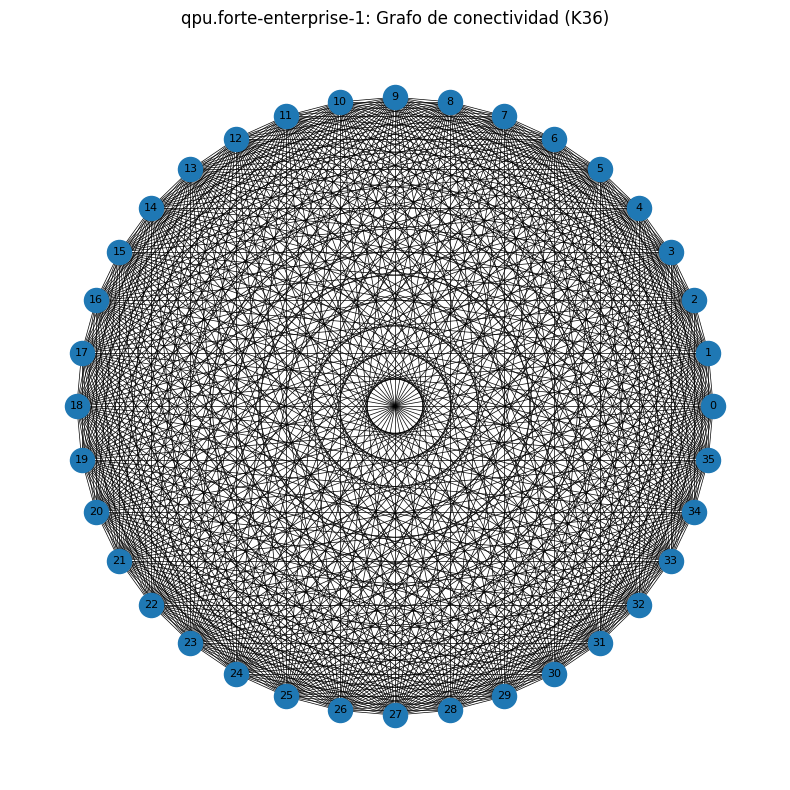

In [9]:
# Visualizar el `connectivity` de qpu.forte-enterprise-1 con NetworkX + Matplotlib (sin estilos ni colores explícitos)
import matplotlib.pyplot as plt
import networkx as nx

# Lista de pares (conectividad all-to-all) provista por vos
connectivity = [
[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], [0, 25], [0, 26], [0, 27], [0, 28], [0, 29], [0, 30], [0, 31], [0, 32], [0, 33], [0, 34], [0, 35], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [1, 30], [1, 31], [1, 32], [1, 33], [1, 34], [1, 35], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [2, 20], [2, 21], [2, 22], [2, 23], [2, 24], [2, 25], [2, 26], [2, 27], [2, 28], [2, 29], [2, 30], [2, 31], [2, 32], [2, 33], [2, 34], [2, 35], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [3, 21], [3, 22], [3, 23], [3, 24], [3, 25], [3, 26], [3, 27], [3, 28], [3, 29], [3, 30], [3, 31], [3, 32], [3, 33], [3, 34], [3, 35], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [4, 20], [4, 21], [4, 22], [4, 23], [4, 24], [4, 25], [4, 26], [4, 27], [4, 28], [4, 29], [4, 30], [4, 31], [4, 32], [4, 33], [4, 34], [4, 35], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [5, 15], [5, 16], [5, 17], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [5, 30], [5, 31], [5, 32], [5, 33], [5, 34], [5, 35], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14], [6, 15], [6, 16], [6, 17], [6, 18], [6, 19], [6, 20], [6, 21], [6, 22], [6, 23], [6, 24], [6, 25], [6, 26], [6, 27], [6, 28], [6, 29], [6, 30], [6, 31], [6, 32], [6, 33], [6, 34], [6, 35], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14], [7, 15], [7, 16], [7, 17], [7, 18], [7, 19], [7, 20], [7, 21], [7, 22], [7, 23], [7, 24], [7, 25], [7, 26], [7, 27], [7, 28], [7, 29], [7, 30], [7, 31], [7, 32], [7, 33], [7, 34], [7, 35], [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [8, 14], [8, 15], [8, 16], [8, 17], [8, 18], [8, 19], [8, 20], [8, 21], [8, 22], [8, 23], [8, 24], [8, 25], [8, 26], [8, 27], [8, 28], [8, 29], [8, 30], [8, 31], [8, 32], [8, 33], [8, 34], [8, 35], [9, 10], [9, 11], [9, 12], [9, 13], [9, 14], [9, 15], [9, 16], [9, 17], [9, 18], [9, 19], [9, 20], [9, 21], [9, 22], [9, 23], [9, 24], [9, 25], [9, 26], [9, 27], [9, 28], [9, 29], [9, 30], [9, 31], [9, 32], [9, 33], [9, 34], [9, 35], [10, 11], [10, 12], [10, 13], [10, 14], [10, 15], [10, 16], [10, 17], [10, 18], [10, 19], [10, 20], [10, 21], [10, 22], [10, 23], [10, 24], [10, 25], [10, 26], [10, 27], [10, 28], [10, 29], [10, 30], [10, 31], [10, 32], [10, 33], [10, 34], [10, 35], [11, 12], [11, 13], [11, 14], [11, 15], [11, 16], [11, 17], [11, 18], [11, 19], [11, 20], [11, 21], [11, 22], [11, 23], [11, 24], [11, 25], [11, 26], [11, 27], [11, 28], [11, 29], [11, 30], [11, 31], [11, 32], [11, 33], [11, 34], [11, 35], [12, 13], [12, 14], [12, 15], [12, 16], [12, 17], [12, 18], [12, 19], [12, 20], [12, 21], [12, 22], [12, 23], [12, 24], [12, 25], [12, 26], [12, 27], [12, 28], [12, 29], [12, 30], [12, 31], [12, 32], [12, 33], [12, 34], [12, 35], [13, 14], [13, 15], [13, 16], [13, 17], [13, 18], [13, 19], [13, 20], [13, 21], [13, 22], [13, 23], [13, 24], [13, 25], [13, 26], [13, 27], [13, 28], [13, 29], [13, 30], [13, 31], [13, 32], [13, 33], [13, 34], [13, 35], [14, 15], [14, 16], [14, 17], [14, 18], [14, 19], [14, 20], [14, 21], [14, 22], [14, 23], [14, 24], [14, 25], [14, 26], [14, 27], [14, 28], [14, 29], [14, 30], [14, 31], [14, 32], [14, 33], [14, 34], [14, 35], [15, 16], [15, 17], [15, 18], [15, 19], [15, 20], [15, 21], [15, 22], [15, 23], [15, 24], [15, 25], [15, 26], [15, 27], [15, 28], [15, 29], [15, 30], [15, 31], [15, 32], [15, 33], [15, 34], [15, 35], [16, 17], [16, 18], [16, 19], [16, 20], [16, 21], [16, 22], [16, 23], [16, 24], [16, 25], [16, 26], [16, 27], [16, 28], [16, 29], [16, 30], [16, 31], [16, 32], [16, 33], [16, 34], [16, 35], [17, 18], [17, 19], [17, 20], [17, 21], [17, 22], [17, 23], [17, 24], [17, 25], [17, 26], [17, 27], [17, 28], [17, 29], [17, 30], [17, 31], [17, 32], [17, 33], [17, 34], [17, 35], [18, 19], [18, 20], [18, 21], [18, 22], [18, 23], [18, 24], [18, 25], [18, 26], [18, 27], [18, 28], [18, 29], [18, 30], [18, 31], [18, 32], [18, 33], [18, 34], [18, 35], [19, 20], [19, 21], [19, 22], [19, 23], [19, 24], [19, 25], [19, 26], [19, 27], [19, 28], [19, 29], [19, 30], [19, 31], [19, 32], [19, 33], [19, 34], [19, 35], [20, 21], [20, 22], [20, 23], [20, 24], [20, 25], [20, 26], [20, 27], [20, 28], [20, 29], [20, 30], [20, 31], [20, 32], [20, 33], [20, 34], [20, 35], [21, 22], [21, 23], [21, 24], [21, 25], [21, 26], [21, 27], [21, 28], [21, 29], [21, 30], [21, 31], [21, 32], [21, 33], [21, 34], [21, 35], [22, 23], [22, 24], [22, 25], [22, 26], [22, 27], [22, 28], [22, 29], [22, 30], [22, 31], [22, 32], [22, 33], [22, 34], [22, 35], [23, 24], [23, 25], [23, 26], [23, 27], [23, 28], [23, 29], [23, 30], [23, 31], [23, 32], [23, 33], [23, 34], [23, 35], [24, 25], [24, 26], [24, 27], [24, 28], [24, 29], [24, 30], [24, 31], [24, 32], [24, 33], [24, 34], [24, 35], [25, 26], [25, 27], [25, 28], [25, 29], [25, 30], [25, 31], [25, 32], [25, 33], [25, 34], [25, 35], [26, 27], [26, 28], [26, 29], [26, 30], [26, 31], [26, 32], [26, 33], [26, 34], [26, 35], [27, 28], [27, 29], [27, 30], [27, 31], [27, 32], [27, 33], [27, 34], [27, 35], [28, 29], [28, 30], [28, 31], [28, 32], [28, 33], [28, 34], [28, 35], [29, 30], [29, 31], [29, 32], [29, 33], [29, 34], [29, 35], [30, 31], [30, 32], [30, 33], [30, 34], [30, 35], [31, 32], [31, 33], [31, 34], [31, 35], [32, 33], [32, 34], [32, 35], [33, 34], [33, 35], [34, 35]
]

# Grafo y layout
G = nx.Graph()
G.add_nodes_from(range(36))
G.add_edges_from(map(tuple, connectivity))

# Disposición circular para ver rápidamente el "all-to-all"
pos = nx.circular_layout(G)

plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_size=300)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=0.5)
plt.axis("off")
plt.title("qpu.forte-enterprise-1: Grafo de conectividad (K36)")
plt.tight_layout()
plt.savefig("/mnt/data/forte_enterprise1_connectivity.png", dpi=150)
plt.show()

# Además, mostramos algunas métricas básicas que te sirven para compilar/rutear
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = [deg for _, deg in G.degree()]
diameter = 1  # En K_n el diámetro es 1
min_deg = min(degrees)
max_deg = max(degrees)
avg_deg = sum(degrees) / len(degrees)

print({
    "nodes": num_nodes,
    "edges": num_edges,
    "diameter": diameter,
    "min_degree": min_deg,
    "max_degree": max_deg,
    "avg_degree": avg_deg
})

print("Imagen guardada en: /mnt/data/forte_enterprise1_connectivity.png")


In [ ]:
from qiskit.transpiler import CouplingMap
from qiskit.visualization import plot_coupling_map

cm = CouplingMap(couplinglist=connectivity, description="IonQ Forte Enterprise 1")

# Prepare qubit coordinates from pos (convert numpy arrays to tuples)
qubit_coordinates = [tuple(pos[q]) for q in range(cm.size())]
num_qubits = cm.size()

# ...existing code...
fig = plot_coupling_map(
    coupling_map=cm.get_edges(),
    num_qubits=num_qubits,
    qubit_coordinates=qubit_coordinates,
    figsize=(6,6)
)
# ...existing code...



TypeError: object of type 'CouplingMap' has no len()